In [4]:
#import necessary libraries
import cv2
import pytesseract
from matplotlib import pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename

🔍 Detected text in the image: “JALISCO


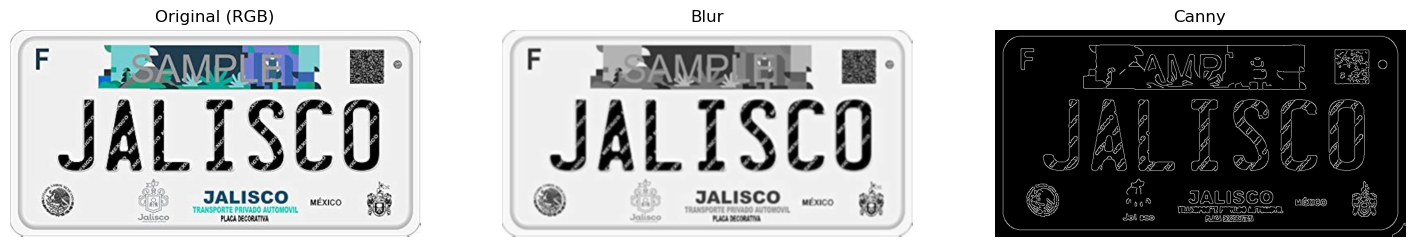

In [9]:

# ========== LOAD IMAGE ==========
# Open a file dialog to select an image
Tk().withdraw()  # Hide the root Tkinter window
file_name = askopenfilename(title="Select an image file", filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp")])

# Read the selected image
imagen = cv2.imread(file_name)

# Convert the image to grayscale
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to smooth the image
suavizada = cv2.GaussianBlur(gris, (7, 7), 0)

# Edge detection using Canny algorithm
bordes = cv2.Canny(suavizada, 100, 200)

# Convert the image to RGB format for matplotlib
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# ======= OCR (Text Recognition) =======
# Perform OCR on the smoothed image (psm 8 = single line of text)
texto_detectado = pytesseract.image_to_string(suavizada, config='--psm 8')

# Print the detected text
print("🔍 Detected text in the image:", texto_detectado.strip())

# ========== DISPLAY RESULTS ==========
plt.figure(figsize=(18, 6))

# Display the original image in RGB format
plt.subplot(1, 3, 1)
plt.title("Original (RGB)")
plt.imshow(imagen_rgb)
plt.axis('off')

# Display the blurred image
plt.subplot(1, 3, 2)
plt.title("Blur")
plt.imshow(suavizada, cmap='gray')
plt.axis('off')

# Display the edges detected using Canny
plt.subplot(1, 3, 3)
plt.title("Canny")
plt.imshow(bordes, cmap='gray')
plt.axis('off')

# Show the plots
plt.show()
